# What is the reality of marijuana citations and arrests in Pittsburgh?

Pittsburgh Arrest Data

https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f?inner_span=True Data Dictionary https://data.wprdc.org/dataset/arrest-data/resource/e554650d-f48f-49b2-88f3-e19878a1c245?inner_span=True

Pittsburgh Police Non-Traffic Citation Data

Data https://data.wprdc.org/dataset/non-traffic-citations/resource/6b11e87d-1216-463d-bbd3-37460e539d86 Data Dictionary https://data.wprdc.org/dataset/non-traffic-citations/resource/ec71e915-cd01-4281-86c0-2d3a06701616

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

In [31]:
url= 'https://raw.githubusercontent.com/Police-Data-Accessibility-Project/caasi-help-desk/main/mj-decriminalization/analysis/grief%20to%20action/arrests_citations_merged_data.csv'

In [32]:
mj_data_df = pd.read_csv(url, low_memory = False)

In [33]:
#Arrests and Citations Over Time


### Examining the amount of marijuana related arrests in the city of Pittsburgh from 2017 to 2022

In [34]:
#convert the time column to datetime
mj_data_df['TIME'] = pd.to_datetime(mj_data_df['TIME'])

In [35]:
#extract the year from the date
mj_data_df['YEAR'] = [x.year for x in mj_data_df['TIME']]

In [36]:
#count the number of arrests per year
arrest_citations_by_year_df = mj_data_df.groupby(['YEAR','record_type']).\
aggregate(rec_count=('TIME','count')).\
reset_index().\
copy()

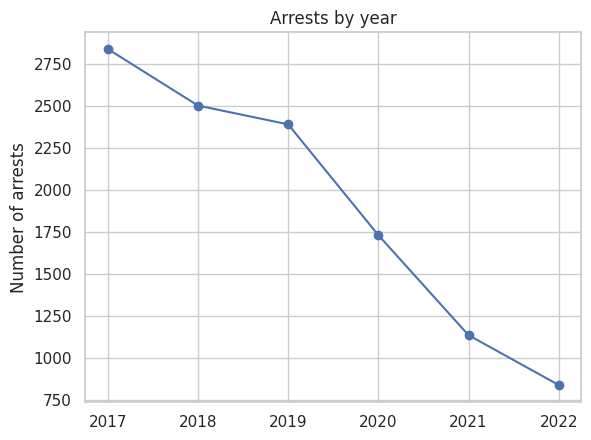

In [37]:
#plot a line graph
plt.plot(arrest_citations_by_year_df['YEAR'].loc[arrest_citations_by_year_df['record_type']=='Arrest'],
       arrest_citations_by_year_df['rec_count'].loc[arrest_citations_by_year_df['record_type']=='Arrest'], marker ='o', linestyle='solid')
plt.title('Arrests by year')
plt.ylabel('Number of arrests')
plt.show()

### Comparing the amount of marijuana arrests that occur within each police zone in the city of Pittsburgh from 2017 to 2022

In [38]:
#group by zone and count
mj_arrests_by_zone = mj_data_df.groupby(['INCIDENTZONE', 'record_type']).\
aggregate(mj_count_zone = ('OFFENSES', 'count')).\
reset_index()

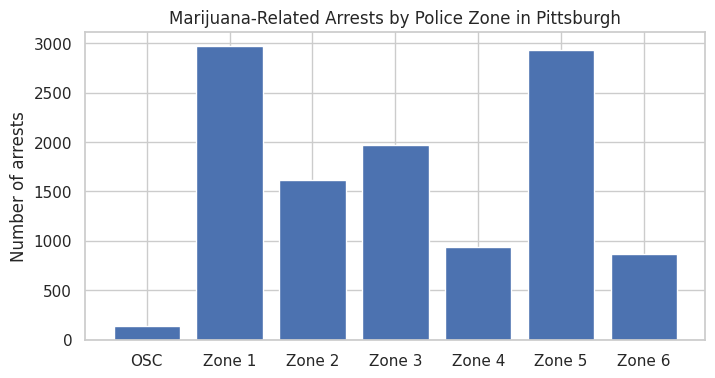

In [39]:
plt.figure(figsize=(8,4))
plt.bar(mj_arrests_by_zone['INCIDENTZONE'].loc[mj_arrests_by_zone['record_type']== 'Arrest'],
        mj_arrests_by_zone['mj_count_zone'].loc[mj_arrests_by_zone['record_type']== 'Arrest'],
        0.8)
plt.title('Marijuana-Related Arrests by Police Zone in Pittsburgh')
plt.ylabel('Number of arrests')
plt.show()

### Comparing the proportion of the amount of marijuana related arrests per race in each police zone in the city of Pittsburgh from 2017 to 2022

In [40]:
#Select from the RACE column 'B' (Black), 'W' (White), and 'H' (Hispanic) records
mj_arrests_zone_race_BHW = mj_data_df.loc[mj_data_df['RACE'].isin(['B','H','W'])].\
  groupby(['INCIDENTZONE','RACE','record_type']).\
  aggregate(mj_count_zone_race =('OFFENSES', 'count')).\
  reset_index().\
  copy()

In [41]:
mj_arrests_zone_race_BHW

,INCIDENTZONE,RACE,record_type,mj_count_zone_race
0,OSC,B,Arrest,103
1,OSC,B,Citation,4
2,OSC,W,Arrest,37
3,Zone 1,B,Arrest,1768
4,Zone 1,B,Citation,85
5,Zone 1,H,Arrest,15
6,Zone 1,W,Arrest,1153
7,Zone 1,W,Citation,18
8,Zone 2,B,Arrest,1095
9,Zone 2,B,Citation,80


In [42]:
#Create a pivot table so we can turn this into a stacked bar chart
arrests_zone_race_pivot = mj_arrests_zone_race_BHW.pivot(index=['INCIDENTZONE','record_type'],
                                               columns ='RACE',values='mj_count_zone_race').\
copy()

In [43]:
arrests_zone_race_pivot

RACE                           B     H       W
INCIDENTZONE record_type                      
OSC          Arrest        103.0   NaN    37.0
             Citation        4.0   NaN     NaN
Zone 1       Arrest       1768.0  15.0  1153.0
             Citation       85.0   NaN    18.0
Zone 2       Arrest       1095.0  13.0   491.0
             Citation       80.0   1.0    18.0
Zone 3       Arrest        897.0  15.0  1015.0
             Citation      169.0   2.0    73.0
Zone 4       Arrest        532.0   7.0   390.0
             Citation       99.0   2.0    55.0
Zone 5       Arrest       2307.0  15.0   578.0
             Citation      395.0   5.0    24.0
Zone 6       Arrest        413.0   7.0   438.0
             Citation       82.0   NaN    30.0

In [44]:
mj_arrests_by_zone_BHW = mj_data_df.loc[mj_data_df['RACE'].isin(['B','H','W'])].\
  groupby(['INCIDENTZONE','record_type']).\
  aggregate(mj_count_zone = ('OFFENSES', 'count')).\
  reset_index().\
  copy()

In [45]:
mj_zone_race_pvt = mj_arrests_zone_race_BHW.pivot(index=['INCIDENTZONE','record_type'], columns='RACE', values='mj_count_zone_race').\
reset_index().\
copy()

In [46]:
mj_zone_race_pvt.columns
mj_zone_race_pvt

RACE,INCIDENTZONE,record_type,B,H,W
0,OSC,Arrest,103.0,NaN,37.0
1,OSC,Citation,4.0,NaN,NaN
2,Zone 1,Arrest,1768.0,15.0,1153.0
3,Zone 1,Citation,85.0,NaN,18.0
4,Zone 2,Arrest,1095.0,13.0,491.0
5,Zone 2,Citation,80.0,1.0,18.0
6,Zone 3,Arrest,897.0,15.0,1015.0
7,Zone 3,Citation,169.0,2.0,73.0
8,Zone 4,Arrest,532.0,7.0,390.0
9,Zone 4,Citation,99.0,2.0,55.0


In [47]:
mj_zone_race_pvt = mj_zone_race_pvt.set_index('record_type')

In [48]:
mj_zone_race_pvt.loc['Arrest']

RACE,INCIDENTZONE,B,H,W
record_type,,,,
Arrest,OSC,103.0,NaN,37.0
Arrest,Zone 1,1768.0,15.0,1153.0
Arrest,Zone 2,1095.0,13.0,491.0
Arrest,Zone 3,897.0,15.0,1015.0
Arrest,Zone 4,532.0,7.0,390.0
Arrest,Zone 5,2307.0,15.0,578.0
Arrest,Zone 6,413.0,7.0,438.0


In [49]:
mj_zone_race_with_totals = mj_zone_race_pvt.merge(mj_arrests_by_zone_BHW, how='left', on=['INCIDENTZONE','record_type'])

In [50]:
mj_zone_race_with_totals

,INCIDENTZONE,record_type,B,H,W,mj_count_zone
0,OSC,Arrest,103.0,NaN,37.0,140
1,OSC,Citation,4.0,NaN,NaN,4
2,Zone 1,Arrest,1768.0,15.0,1153.0,2936
3,Zone 1,Citation,85.0,NaN,18.0,103
4,Zone 2,Arrest,1095.0,13.0,491.0,1599
5,Zone 2,Citation,80.0,1.0,18.0,99
6,Zone 3,Arrest,897.0,15.0,1015.0,1927
7,Zone 3,Citation,169.0,2.0,73.0,244
8,Zone 4,Arrest,532.0,7.0,390.0,929
9,Zone 4,Citation,99.0,2.0,55.0,156


In [51]:
#Create proportions for the races
mj_zone_race_with_totals['Black']= mj_zone_race_with_totals['B']/mj_zone_race_with_totals['mj_count_zone']

In [52]:
mj_zone_race_with_totals['Hispanic']= mj_zone_race_with_totals['H']/mj_zone_race_with_totals['mj_count_zone']

In [53]:
mj_zone_race_with_totals['White']= mj_zone_race_with_totals['W']/mj_zone_race_with_totals['mj_count_zone']

In [54]:
mj_zone_race_with_totals['grand_total'] = mj_zone_race_with_totals['B'] + mj_zone_race_with_totals['H'] + mj_zone_race_with_totals['W']

In [55]:
proportions_df = mj_zone_race_with_totals.loc[:,['INCIDENTZONE','record_type','Black','Hispanic','White']].\
copy()

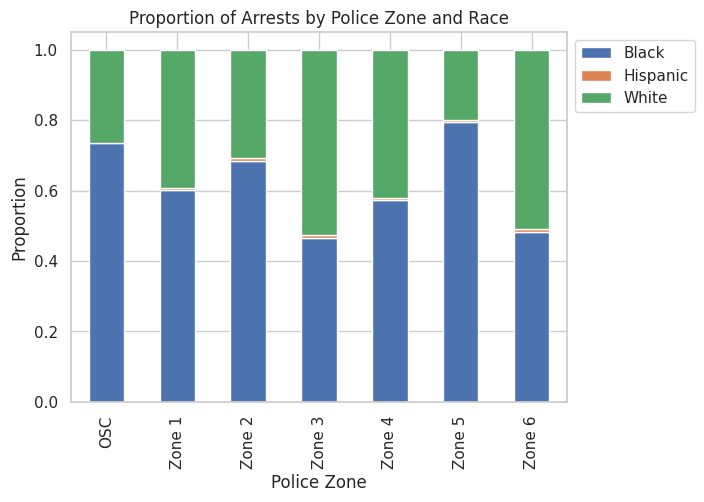

In [56]:
proportions_df.loc[proportions_df['record_type']=='Arrest'].\
plot(x='INCIDENTZONE',kind='bar', stacked=True)
plt.title('Proportion of Arrests by Police Zone and Race')
plt.xlabel('Police Zone')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

# Marijuana-Related Arrests vs. Other Arrests

In [57]:
#Get path for only arrest data
path = 'https://raw.githubusercontent.com/Police-Data-Accessibility-Project/caasi-help-desk/main/mj-decriminalization/analysis/grief%20to%20action/arrest_data_wprdc.csv'
arrest_df = pd.read_csv(path, low_memory=False)

#Filter out dates:
#December 2015 decriminalized up to 30 grams in pgh.
subset_arr_df = arrest_df.loc[(arrest_df['ARRESTTIME'] >= "2016-01-01") & (arrest_df['ARRESTTIME'] < "2021-01-01")].\
          copy()
#Gets rid of 20k rows

#Create a marijuana and paraphernelia flag
subset_arr_df['marijuana_flag'] = [1 if ('marijuana' in str(x).lower()) else 0 for x in subset_arr_df['OFFENSES']]

subset_arr_df['paraphernalia_flag'] = [1 if 'paraphernalia' in str(x).lower() else 0 for x in subset_arr_df['OFFENSES']]

subset_arr_df.loc[subset_arr_df['marijuana_flag'] == 1].head()

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,marijuana_flag,paraphernalia_flag
16,17,1975138,16160913,22.0,F,W,2016-08-27T02:04:00,"Middle ST & Suismon ST Pittsburgh, PA 15212",5505 Public Drunkenness / 13(a)(32) Parapherna...,"Middle ST & Suismon ST Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-79.999646,40.455364,1,1
33,34,1974767,16151393,32.0,M,W,2016-08-13T17:08:00,"Bedford AV & Herron AV Pittsburgh, PA 15219",4303 General Lighting Requirements. / 13(a)(31...,"Bedford AV & Herron AV Pittsburgh, PA 15219",Middle Hill,2,501.0,6.0,3.0,-79.964925,40.452883,1,0
57,58,1974709,16149939,21.0,F,B,2016-08-11T18:12:00,"2300 Block East Hills DR Pittsburgh, PA 15221",4910 Tampering with or Fabricating Physical Ev...,"2300 Block East Hills DR Pittsburgh, PA 15221",East Hills,5,1306.0,9.0,2.0,-79.871361,40.456565,1,0
73,74,1975020,16157206,23.0,M,B,2016-08-22T02:56:00,"Fountain ST & Sandusky ST N Pittsburgh, PA 15212",1543 Driving While Operating Privilege is Susp...,"Fountain ST & Sandusky ST Pittsburgh, PA 15212",Central Northside,1,2206.0,6.0,1.0,-80.005533,40.458972,1,0
83,84,1974775,16151710,19.0,M,B,2016-08-14T02:15:00,"1000 Block Western AV Pittsburgh, PA 15233",13(a)(16) Possession of Controlled Substance /...,"1000 Block Western AV NEW KENSINGTON, PA 15068",Outside County,OSC,6699.0,NaN,NaN,-79.730033,40.586214,1,1


In [58]:
B_MJ_Arrests = subset_arr_df.loc[(subset_arr_df['marijuana_flag'] == 1) & (subset_arr_df['RACE'] == 'B')].copy() #B arrests for mar vs.
B_Other_Arrests = subset_arr_df.loc[(subset_arr_df['marijuana_flag'] == 0) & (subset_arr_df['RACE'] == 'B')].copy()

W_MJ_Arrests = subset_arr_df.loc[(subset_arr_df['marijuana_flag'] == 1) & (subset_arr_df['RACE'] == 'W')].copy() #B arrests for mar vs.
W_Other_Arrests = subset_arr_df.loc[(subset_arr_df['marijuana_flag'] == 0) & (subset_arr_df['RACE'] == 'W')].copy()

In [59]:
arr_by_race = subset_arr_df.groupby(['RACE', 'marijuana_flag']).\
                          aggregate(arr_count_race = ("OFFENSES", "count")).\
                          reset_index().copy()

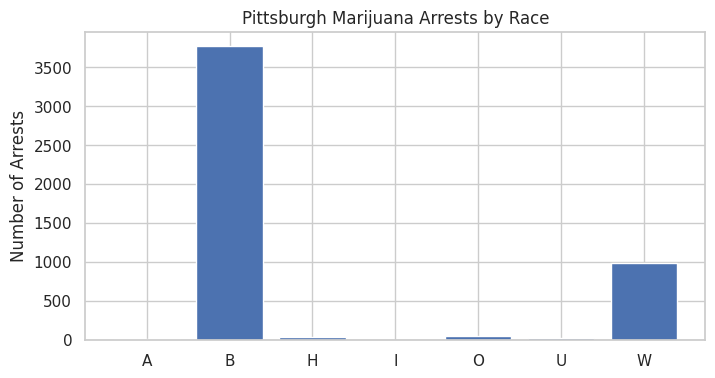

In [60]:
plt.figure(figsize = (8,4))
plt.bar(arr_by_race['RACE'].loc[arr_by_race['marijuana_flag']==1],
        arr_by_race['arr_count_race'].loc[arr_by_race['marijuana_flag']==1], 0.8)
plt.title('Pittsburgh Marijuana Arrests by Race')
plt.ylabel('Number of Arrests')
plt.show()

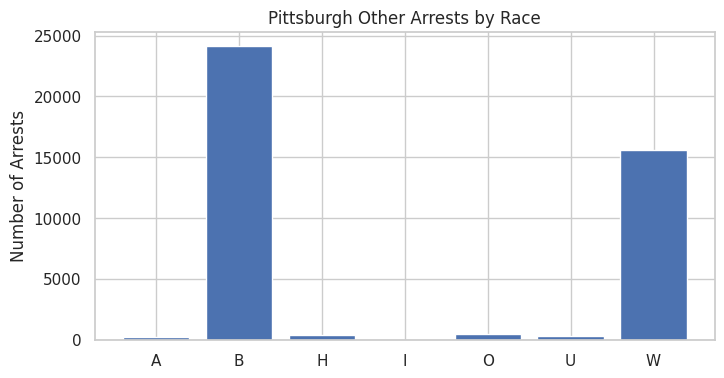

In [61]:
#Other arrests:
plt.figure(figsize = (8,4))
plt.bar(arr_by_race['RACE'].loc[arr_by_race['marijuana_flag']==0],
        arr_by_race['arr_count_race'].loc[arr_by_race['marijuana_flag']==0], 0.8)
plt.title('Pittsburgh Other Arrests by Race')
plt.ylabel('Number of Arrests')
plt.show()

In [62]:
#Comparing the proportion:
#Stacked bar charts:
arrest_by_race_by_type = subset_arr_df.loc[subset_arr_df['RACE'].isin(['B', 'H', 'W'])].\
                      groupby(['RACE', 'marijuana_flag']).\
                      aggregate(arr_count_race_type = ( 'OFFENSES', 'count')).\
                      reset_index().\
                      copy()

In [63]:
#Pivot:
arrest_by_race_pvt = arrest_by_race_by_type.pivot(index=['RACE'], columns = 'marijuana_flag', values = 'arr_count_race_type').\
          reset_index().\
          copy()

In [64]:
arrest_by_race_pvt.set_index('RACE', inplace=True)
arrest_by_race_pvt.columns=["Other Charge", "Marijuana Charge"]

prop_df = arrest_by_race_pvt.copy()

#Calculate proportions
prop_df["Proportion of Marijuana Arrests"] = prop_df["Marijuana Charge"]/prop_df["Other Charge"]
prop_df["Total"] = prop_df["Marijuana Charge"] + prop_df["Other Charge"]
prop_df["Proportion of Other Arrests"] = 1 - prop_df["Proportion of Marijuana Arrests"]

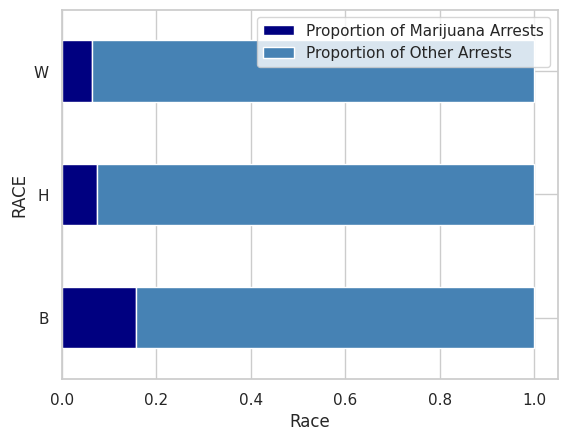

In [65]:
#colors
chosen_colors = ['navy', 'steelblue']
prop_df[['Proportion of Marijuana Arrests', 'Proportion of Other Arrests']].plot(kind='barh', stacked=True, color = chosen_colors)
plt.xlabel('Race')
plt.show()

In [66]:
#Same thing for citations:
cit_path = 'https://raw.githubusercontent.com/Police-Data-Accessibility-Project/caasi-help-desk/main/mj-decriminalization/analysis/grief%20to%20action/citation_data_wprdc.csv'
cit_df = pd.read_csv(cit_path, low_memory=False)

#Filter out dates:
#December 2015 decriminalized up to 30 grams in pgh.
subset_cit_df = cit_df.loc[(cit_df['CITEDTIME'] >= "2016-01-01") & (cit_df['CITEDTIME'] < "2021-01-01")].\
          copy()
#Gets rid of 20k rows

#Create a marijuana and paraphernelia flag
subset_cit_df['marijuana_flag'] = [1 if ('marijuana' in str(x).lower()) else 0 for x in subset_cit_df['OFFENSES']]

subset_cit_df['paraphernalia_flag'] = [1 if 'paraphernalia' in str(x).lower() else 0 for x in subset_cit_df['OFFENSES']]

In [67]:
B_MJ_Citations = subset_cit_df.loc[(subset_cit_df['marijuana_flag'] == 1) & (subset_cit_df['RACE'] == 'B')].copy() #B citests for mar vs.
B_Other_Citations = subset_cit_df.loc[(subset_cit_df['marijuana_flag'] == 0) & (subset_cit_df['RACE'] == 'B')].copy()

W_MJ_Citations = subset_cit_df.loc[(subset_cit_df['marijuana_flag'] == 1) & (subset_cit_df['RACE'] == 'W')].copy() #B citests for mar vs.
W_Other_Citations = subset_cit_df.loc[(subset_cit_df['marijuana_flag'] == 0) & (subset_cit_df['RACE'] == 'W')].copy()

In [68]:
cit_by_race = subset_cit_df.groupby(['RACE', 'marijuana_flag']).\
                          aggregate(cit_count_race = ("OFFENSES", "count")).\
                          reset_index().copy()

In [69]:
#Stacked bar charts:
citation_by_race_by_type = subset_cit_df.loc[subset_cit_df['RACE'].isin(['B', 'H', 'W'])].\
                      groupby(['RACE', 'marijuana_flag']).\
                      aggregate(cit_count_race_type = ( 'OFFENSES', 'count')).\
                      reset_index().\
                      copy()

In [70]:
#Pivot:
citation_by_race_pvt = citation_by_race_by_type.pivot(index=['RACE'], columns = 'marijuana_flag', values = 'cit_count_race_type').\
          reset_index().\
          copy()

In [71]:
citation_by_race_pvt.set_index('RACE', inplace=True)
citation_by_race_pvt.columns=["Other Citation", "Marijuana Citation"]

cit_prop_df = citation_by_race_pvt.copy()

#Calculate proportions
cit_prop_df["Proportion of Marijuana Citations"] = cit_prop_df["Marijuana Citation"]/cit_prop_df["Other Citation"]
cit_prop_df["Total"] = cit_prop_df["Marijuana Citation"] + cit_prop_df["Other Citation"]
cit_prop_df["Proportion of Other Citations"] = 1 - cit_prop_df["Proportion of Marijuana Citations"]

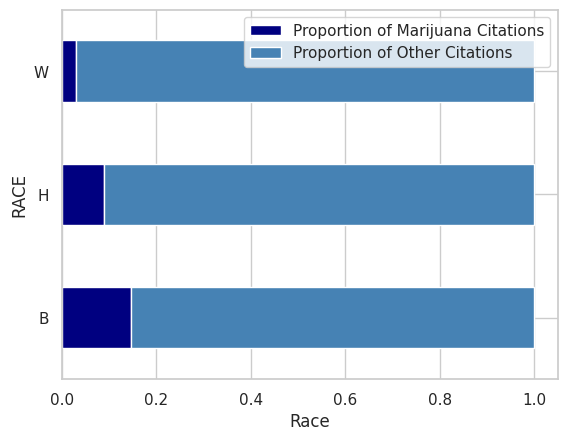

In [72]:
cit_prop_df[['Proportion of Marijuana Citations', 'Proportion of Other Citations']].plot(kind='barh', stacked=True, color = chosen_colors)
plt.xlabel('Race')
plt.show()

### Comparing the amount of marijuana citations that occur within each police zone in the city of Pittsburgh from 2017 to 2022

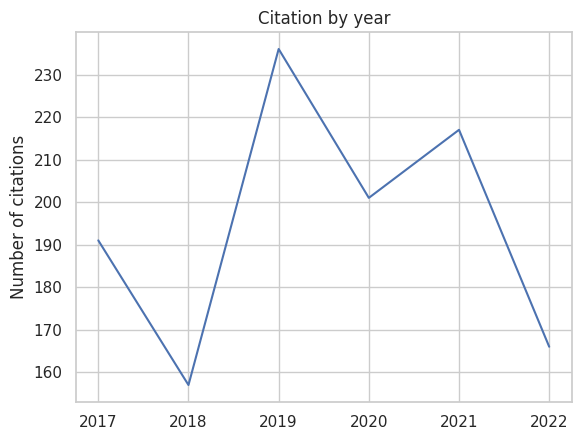

In [73]:
plt.plot(arrest_citations_by_year_df['YEAR'].loc[arrest_citations_by_year_df['record_type']=='Citation'],
         arrest_citations_by_year_df['rec_count'].loc[arrest_citations_by_year_df['record_type']=='Citation'])
plt.title('Citation by year')
plt.ylabel('Number of citations')
plt.show()

### Comparing the amount of marijuana citations that occur within each police zone in the city of Pittsburgh from 2017 to 2022

In [74]:
mj_citations_by_zone = mj_data_df.groupby(['INCIDENTZONE', 'record_type']).\
aggregate(mj_count_zone = ('OFFENSES', 'count')).\
reset_index()

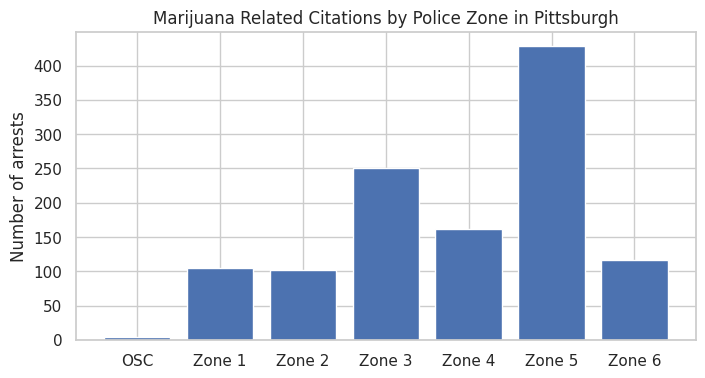

In [75]:
plt.figure(figsize=(8,4))
plt.bar(mj_citations_by_zone['INCIDENTZONE'].loc[mj_citations_by_zone['record_type']== 'Citation'],
        mj_citations_by_zone['mj_count_zone'].loc[mj_citations_by_zone['record_type']== 'Citation'],
        0.8)
plt.title('Marijuana Related Citations by Police Zone in Pittsburgh')
plt.ylabel('Number of arrests')
plt.show()

### Comparing the proportion of the amount of marijuana related arrests per race in each police zone in the city of Pittsburgh from 2017 to 2022

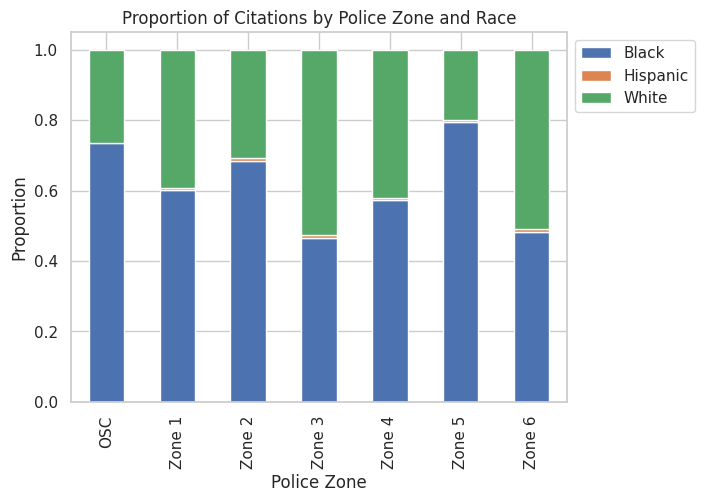

In [76]:
proportions_df.loc[proportions_df['record_type']=='Arrest'].\
plot(x='INCIDENTZONE',kind='bar', stacked=True)
plt.title('Proportion of Citations by Police Zone and Race')
plt.xlabel('Police Zone')
plt.ylabel('Proportion')
plt.legend(bbox_to_anchor=(1,1))
plt.show()

In [77]:
#Arrests vs. Citations:

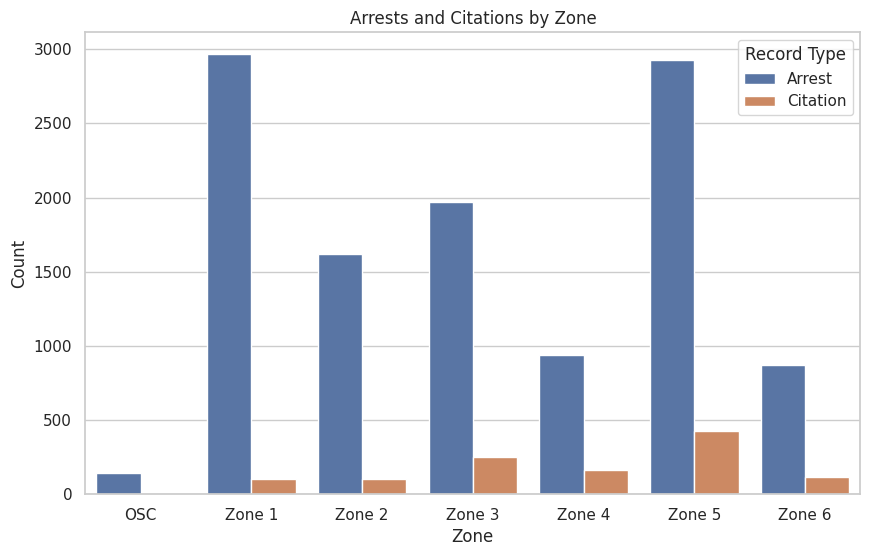

In [78]:
#Plot arrests and citations per zone
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='INCIDENTZONE', y='mj_count_zone', hue='record_type', data=mj_citations_by_zone, estimator=sum, errorbar=None)

plt.title('Arrests and Citations by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')

# Show plot
plt.legend(title='Record Type')
plt.show()

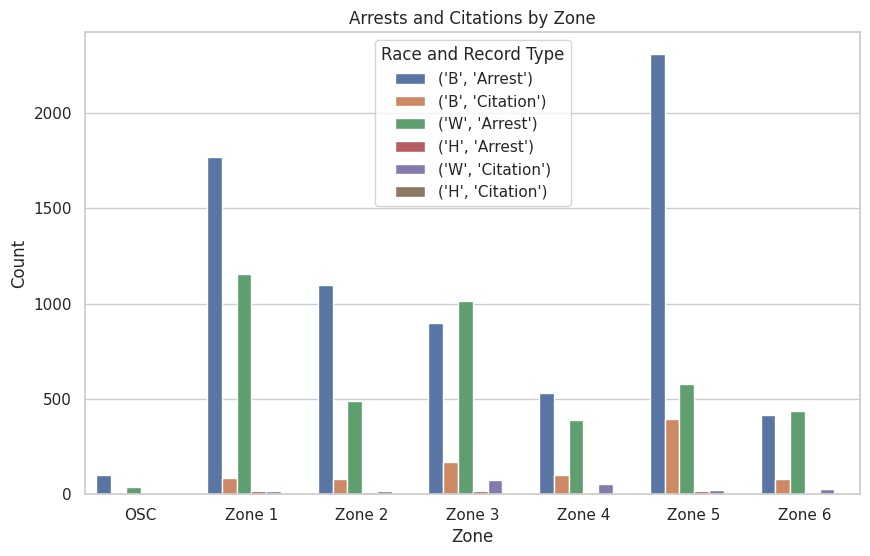

In [79]:
"""mj_citations_by_zone.groupby(["INCIDENTZONE"]).plot(kind='bar', stacked=True)
plt.title('Arrests and Citations by Race by Zone')
plt.xticks(rotation=0, ha='center')
plt.savefig('Marijuana_arrests_and_citations_by_race_zone1.png')
plt.show()"""

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='INCIDENTZONE', y='mj_count_zone_race', hue=mj_arrests_zone_race_BHW[['RACE', 'record_type']].apply(tuple, axis=1), data=mj_arrests_zone_race_BHW, estimator=sum, errorbar=None)

#hue=tips[['sex', 'smoker']].apply(tuple, axis=1))

plt.title('Arrests and Citations by Zone')
plt.xlabel('Zone')
plt.ylabel('Count')

# Show plot
plt.legend(title='Race and Record Type')
plt.show()

In [80]:
#Create Age bins:
# define the bin edges
bins = [0, 20, 40, 60, 80, 115]
labels = ['0-20 Years', '20-40 Years', '40-60 Years', '60-80 Years', '80+']

# bin the age column
mj_data_df['age_bins'] = pd.cut(mj_data_df['AGE'], bins, labels=labels)
mj_data_df

,index,_id,PK,CCR,AGE,GENDER,RACE,TIME,ARRESTLOCATION,OFFENSES,...,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y,record_type,marijuana_flag,YEAR,age_bins
0,3851,3852,1979466,16207605,54.0,M,B,2017-01-05 00:02:00,"5th AV & Pride ST Pittsburgh, PA 15219",4910 Tampering with or Fabricating Physical Ev...,...,Zone 2,305.0,6.0,3.0,-79.977467,40.438224,Arrest,1,2017,40-60 Years
1,3927,3928,1979566,16235765,23.0,F,B,2017-01-09 17:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",4304(a)(1) Endangering Welfare of Children. / ...,...,Zone 2,103.0,6.0,3.0,-79.977530,40.438003,Arrest,1,2017,20-40 Years
2,4114,4115,1979812,16236311,15.0,M,B,2017-01-06 13:20:00,Zone 2,5503 Disorderly Conduct. / 13(a)(31) Marijuana...,...,Zone 5,NaN,NaN,NaN,NaN,NaN,Arrest,1,2017,0-20 Years
3,4189,4190,1979900,17000760,34.0,M,W,2017-01-02 09:12:00,"10 Block 40th ST Pittsburgh, PA 15201",13(a)(16) Possession of Controlled Substance /...,...,Zone 2,901.0,7.0,2.0,-79.964880,40.470229,Arrest,1,2017,20-40 Years
4,4208,4209,1979939,17001618,20.0,M,B,2017-01-03 15:40:00,"44th ST & Calvin ST Pittsburgh, PA 15201",13(a)(16) Possession of Controlled Substance /...,...,Zone 2,902.0,7.0,2.0,-79.953776,40.466623,Arrest,1,2017,0-20 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12607,14207,23810,1102683,22206375,29.0,M,B,2022-12-28 20:43:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,Zone 5,1208,9.0,2.0,-79.915806,40.460814,Citation,1,2022,20-40 Years
12608,14211,23814,1102687,22206961,19.0,M,W,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,Zone 3,1921,3.0,5.0,-80.000256,40.430975,Citation,1,2022,0-20 Years
12609,14212,23815,1102688,22206961,19.0,M,B,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,Zone 3,1921,3.0,5.0,-80.000256,40.430975,Citation,1,2022,0-20 Years
12610,14213,23816,1102689,22206961,20.0,M,B,2022-12-30 02:00:00,NaN,627.02(b)(i) Possessing a small amount of mari...,...,Zone 3,1921,3.0,5.0,-80.000256,40.430975,Citation,1,2022,0-20 Years


In [81]:
mj_by_age_by_race_BHW = mj_data_df.loc[mj_data_df['RACE'].isin(['B', 'H', 'W'])].\
                      groupby(['age_bins', 'RACE', 'record_type']).\
                      aggregate(mj_count_zone_race = ( 'OFFENSES', 'count')).\
                      reset_index().\
                      copy()

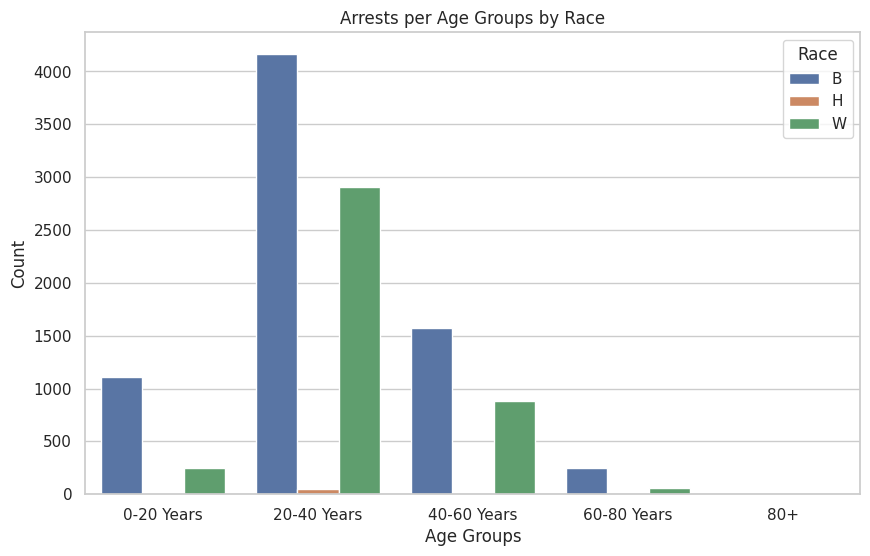

In [82]:
just_arrests = mj_by_age_by_race_BHW.loc[mj_by_age_by_race_BHW["record_type"]=="Arrest"].copy()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='age_bins', y='mj_count_zone_race', hue='RACE', data=just_arrests, estimator=sum, errorbar=None)

plt.title('Arrests per Age Groups by Race')
plt.xlabel('Age Groups')
plt.ylabel('Count')

# Show plot
plt.legend(title='Race')
plt.show()